# Part_3(Linear_Regression)

In [ ]:
#"I certify that the code and data in this assignment were generated independently,
#using only the tools and resources defined in the course and that I (we) did not receive
#any external help, coaching or contributions during the production of this work."


In [2]:
import pandas as pd
import numpy as np
import math
import operator
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df2 = pd.read_csv("penguins.csv")

In [5]:
print(df2)

       species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen            39.1           18.7              181.0   
1       Adelie  Torgersen            39.5           17.4              186.0   
2       Adelie  Torgersen            40.3           18.0              195.0   
3       Adelie  Torgersen             NaN            NaN                NaN   
4       Adelie  Torgersen            36.7           19.3              193.0   
..         ...        ...             ...            ...                ...   
339  Chinstrap      Dream            55.8           19.8              207.0   
340  Chinstrap      Dream            43.5           18.1              202.0   
341  Chinstrap      Dream            49.6           18.2              193.0   
342  Chinstrap      Dream            50.8           19.0              210.0   
343  Chinstrap      Dream            50.2           18.7              198.0   

     body_mass_g     sex  year  
0         3750.0  

In [6]:
df2.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female,2007
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male,2007
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,2007
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,2007


In [7]:
size=df2.size
print(size)

2752


In [8]:
shape=df2.shape
print(shape)

(344, 8)


In [10]:
des=df2.describe()
print(des)

       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
count      342.000000     342.000000         342.000000   342.000000   
mean        43.921930      17.151170         200.915205  4201.754386   
std          5.459584       1.974793          14.061714   801.954536   
min         32.100000      13.100000         172.000000  2700.000000   
25%         39.225000      15.600000         190.000000  3550.000000   
50%         44.450000      17.300000         197.000000  4050.000000   
75%         48.500000      18.700000         213.000000  4750.000000   
max         59.600000      21.500000         231.000000  6300.000000   

              year  
count   344.000000  
mean   2008.029070  
std       0.818356  
min    2007.000000  
25%    2007.000000  
50%    2008.000000  
75%    2009.000000  
max    2009.000000  


In [11]:
df2.isnull().sum(0)

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [12]:
df2.isnull().sum(1)

0      0
1      0
2      0
3      5
4      0
      ..
339    0
340    0
341    0
342    0
343    0
Length: 344, dtype: int64

In [13]:
df2.isnull().sum(axis=0)

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [14]:
df2.dropna(inplace= True)

In [15]:
df2

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [16]:
cat = pd.Categorical(df2)

In [17]:
print(cat)

['species', 'island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex', 'year']
Categories (8, object): ['bill_depth_mm', 'bill_length_mm', 'body_mass_g', 'flipper_length_mm', 'island', 'sex', 'species', 'year']


In [18]:
import matplotlib.pyplot as plt

In [19]:
cat_sp = pd.Categorical(df2.species)

In [20]:
cat_sp

['Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', ..., 'Chinstrap', 'Chinstrap', 'Chinstrap', 'Chinstrap', 'Chinstrap']
Length: 333
Categories (3, object): ['Adelie', 'Chinstrap', 'Gentoo']

In [21]:
cat_is= pd.Categorical(df2.island)

In [22]:
cat_is

['Torgersen', 'Torgersen', 'Torgersen', 'Torgersen', 'Torgersen', ..., 'Dream', 'Dream', 'Dream', 'Dream', 'Dream']
Length: 333
Categories (3, object): ['Biscoe', 'Dream', 'Torgersen']

In [23]:
cat_sex = pd.Categorical(df2.sex)

In [24]:
cat_sex

['male', 'female', 'female', 'female', 'male', ..., 'male', 'female', 'male', 'male', 'female']
Length: 333
Categories (2, object): ['female', 'male']

In [25]:
df2['bill_length_mm'].value_counts(normalize = True)

41.1    0.021021
45.2    0.018018
39.6    0.015015
50.0    0.015015
46.5    0.015015
          ...   
54.2    0.003003
36.9    0.003003
54.3    0.003003
43.8    0.003003
43.4    0.003003
Name: bill_length_mm, Length: 163, dtype: float64

In [26]:
df2['bill_depth_mm'].value_counts(normalize = True)

17.0    0.036036
15.0    0.030030
18.6    0.030030
18.5    0.030030
17.9    0.030030
          ...   
13.6    0.003003
17.4    0.003003
20.6    0.003003
13.2    0.003003
13.3    0.003003
Name: bill_depth_mm, Length: 79, dtype: float64

In [27]:
df2['flipper_length_mm'].value_counts(normalize = True)

190.0    0.063063
195.0    0.051051
187.0    0.048048
210.0    0.042042
193.0    0.042042
191.0    0.039039
215.0    0.036036
196.0    0.030030
197.0    0.030030
185.0    0.027027
208.0    0.024024
198.0    0.024024
220.0    0.024024
189.0    0.021021
230.0    0.021021
192.0    0.021021
181.0    0.021021
184.0    0.021021
212.0    0.021021
216.0    0.018018
188.0    0.018018
213.0    0.018018
222.0    0.018018
201.0    0.018018
186.0    0.018018
199.0    0.018018
194.0    0.015015
203.0    0.015015
219.0    0.015015
214.0    0.015015
218.0    0.015015
221.0    0.015015
217.0    0.015015
209.0    0.015015
202.0    0.012012
228.0    0.012012
200.0    0.012012
178.0    0.012012
225.0    0.012012
180.0    0.012012
224.0    0.009009
182.0    0.009009
205.0    0.009009
229.0    0.006006
183.0    0.006006
207.0    0.006006
223.0    0.006006
211.0    0.006006
226.0    0.003003
174.0    0.003003
231.0    0.003003
172.0    0.003003
176.0    0.003003
206.0    0.003003
Name: flipper_length_mm, dty

In [28]:
df2['body_mass_g'].value_counts(normalize = True)

3800.0    0.036036
3700.0    0.030030
3900.0    0.030030
3950.0    0.030030
3550.0    0.027027
            ...   
5450.0    0.003003
4275.0    0.003003
5750.0    0.003003
6300.0    0.003003
3625.0    0.003003
Name: body_mass_g, Length: 93, dtype: float64

In [29]:
df2['year'].value_counts(normalize = True)

2009    0.351351
2008    0.339339
2007    0.309309
Name: year, dtype: float64

In [30]:
normalized_data_year = (df2.year - np.min(df2.year)) / (np.max(df2.year) - np.min(df2.year))

In [31]:
normalized_data_year

0      0.0
1      0.0
2      0.0
4      0.0
5      0.0
      ... 
339    1.0
340    1.0
341    1.0
342    1.0
343    1.0
Name: year, Length: 333, dtype: float64

In [32]:
normalized_data_bill_length_mm = (df2.bill_length_mm - np.min(df2.bill_length_mm)) / (np.max(df2.bill_length_mm) - np.min(df2.bill_length_mm))

In [33]:
normalized_data_bill_length_mm

0      0.254545
1      0.269091
2      0.298182
4      0.167273
5      0.261818
         ...   
339    0.861818
340    0.414545
341    0.636364
342    0.680000
343    0.658182
Name: bill_length_mm, Length: 333, dtype: float64

In [34]:
normalized_data_bill_depth_mm = (df2.bill_depth_mm - np.min(df2.bill_depth_mm)) / (np.max(df2.bill_depth_mm) - np.min(df2.bill_depth_mm))

In [35]:
normalized_data_bill_depth_mm

0      0.666667
1      0.511905
2      0.583333
4      0.738095
5      0.892857
         ...   
339    0.797619
340    0.595238
341    0.607143
342    0.702381
343    0.666667
Name: bill_depth_mm, Length: 333, dtype: float64

In [36]:
normalized_data_flipper_length_mm = (df2.flipper_length_mm - np.min(df2.flipper_length_mm)) / (np.max(df2.flipper_length_mm) - np.min(df2.flipper_length_mm))

In [37]:
normalized_data_flipper_length_mm

0      0.152542
1      0.237288
2      0.389831
4      0.355932
5      0.305085
         ...   
339    0.593220
340    0.508475
341    0.355932
342    0.644068
343    0.440678
Name: flipper_length_mm, Length: 333, dtype: float64

In [38]:
normalized_data_body_mass_g = (df2.body_mass_g - np.min(df2.body_mass_g)) / (np.max(df2.body_mass_g) - np.min(df2.body_mass_g))

In [39]:
normalized_data_body_mass_g

0      0.291667
1      0.305556
2      0.152778
4      0.208333
5      0.263889
         ...   
339    0.361111
340    0.194444
341    0.298611
342    0.388889
343    0.298611
Name: body_mass_g, Length: 333, dtype: float64

In [40]:
numerical = df2.select_dtypes(exclude=['object'])
categorical=df2.select_dtypes(include=['object'])

In [41]:
numerical.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
0,39.1,18.7,181.0,3750.0,2007
1,39.5,17.4,186.0,3800.0,2007
2,40.3,18.0,195.0,3250.0,2007
4,36.7,19.3,193.0,3450.0,2007
5,39.3,20.6,190.0,3650.0,2007


In [42]:
categorical.head()

,species,island,sex
0,Adelie,Torgersen,male
1,Adelie,Torgersen,female
2,Adelie,Torgersen,female
4,Adelie,Torgersen,female
5,Adelie,Torgersen,male


In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
penguins_data=pd.read_csv('penguins.csv')

In [47]:
len(penguins_data)

344

In [48]:
penguins_data.info

<bound method DataFrame.info of        species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen            39.1           18.7              181.0   
1       Adelie  Torgersen            39.5           17.4              186.0   
2       Adelie  Torgersen            40.3           18.0              195.0   
3       Adelie  Torgersen             NaN            NaN                NaN   
4       Adelie  Torgersen            36.7           19.3              193.0   
..         ...        ...             ...            ...                ...   
339  Chinstrap      Dream            55.8           19.8              207.0   
340  Chinstrap      Dream            43.5           18.1              202.0   
341  Chinstrap      Dream            49.6           18.2              193.0   
342  Chinstrap      Dream            50.8           19.0              210.0   
343  Chinstrap      Dream            50.2           18.7              198.0   

     body_mass_g   

<AxesSubplot:xlabel='sex', ylabel='count'>

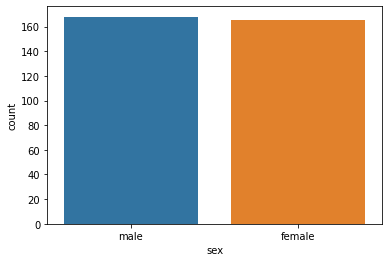

In [49]:
sns.countplot(x='sex',data=penguins_data)

<AxesSubplot:xlabel='sex', ylabel='count'>

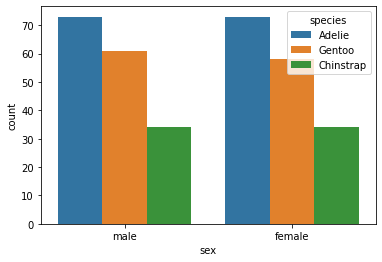

In [50]:
sns.countplot(x='sex',data=penguins_data,hue='species')

In [51]:
penguins_data.isna()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,True,True,True,True,True,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
339,False,False,False,False,False,False,False,False
340,False,False,False,False,False,False,False,False
341,False,False,False,False,False,False,False,False
342,False,False,False,False,False,False,False,False


In [52]:
penguins_data.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [53]:
penguins_data.dropna(inplace= True)

In [54]:
penguins_data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [56]:
data = pd.read_csv('penguins.csv')
print(data.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
3          NaN     NaN  2007  
4       3450.0  female  2007  


In [57]:
data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [58]:
data.dropna(inplace= True)
bill_d = data['bill_depth_mm'].values
bill_l = data['bill_length_mm'].values
mean_bill_d = np.mean(bill_d)
mean_bill_l = np.mean(bill_l)

In [59]:
mean_bill_d

17.164864864864867

In [60]:
mean_bill_l

43.9927927927928

In [113]:
# total no.of input values
m = len(bill_d)

# using the formula to calculate m & c
numerator = 0
denominator = 0
for i in range(m):
  numerator += (bill_d[i] - mean_bill_d) * (bill_l[i] - mean_bill_l)
  denominator += (bill_d[i] - mean_bill_d) ** 2
m = numerator / denominator
c = mean_bill_l - (m * mean_bill_d)

print (m)
print(c)

-0.6349051704195029
54.890854245047564


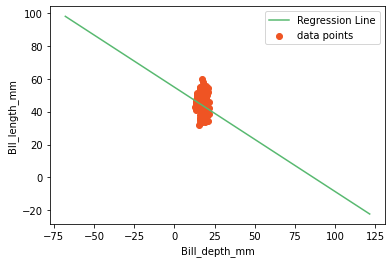

In [114]:
# plotting values and regression line
max_bill_d = np.max(bill_d) + 100
min_bill_d = np.min(bill_l) - 100

# calculating line values x and y
x = np.linspace (min_bill_d, max_bill_d, 100)
y = c + m * x

plt.plot(x, y, color='#58b970', label='Regression Line')
plt.scatter(bill_d, bill_l, c='#ef5423', label='data points')

plt.xlabel('Bill_depth_mm')
plt.ylabel('Bll_length_mm')
plt.legend()
plt.show()

In [63]:
# calculating R-squared value for measuring goodness of our model. 

ss_t = 0 #total sum of squares
ss_r = 0 #total sum of square of residuals

for i in range(len(bill_l)): # val_count represents the no.of input x values
  y_pred = c + m * bill_d[i]
  ss_t += (bill_l[i] - mean_bill_l) ** 2
  ss_r += (bill_l[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)

print(r2)

0.052269681396638235


# Part_4(Ridge_regression)

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [65]:
data = pd.read_csv('penguins.csv')
print(data.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
3          NaN     NaN  2007  
4       3450.0  female  2007  


In [66]:
data.dropna(inplace= True)

In [67]:
bill_d = data['bill_depth_mm'].values
bill_l = data['bill_length_mm'].values
mean_bill_d = np.mean(bill_d)
mean_bill_l = np.mean(bill_l)

In [68]:
data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [69]:
bill_d

array([18.7, 17.4, 18. , 19.3, 20.6, 17.8, 19.6, 17.6, 21.2, 21.1, 17.8,
       19. , 20.7, 18.4, 21.5, 18.3, 18.7, 19.2, 18.1, 17.2, 18.9, 18.6,
       17.9, 18.6, 18.9, 16.7, 18.1, 17.8, 18.9, 17. , 21.1, 20. , 18.5,
       19.3, 19.1, 18. , 18.4, 18.5, 19.7, 16.9, 18.8, 19. , 17.9, 21.2,
       17.7, 18.9, 17.9, 19.5, 18.1, 18.6, 17.5, 18.8, 16.6, 19.1, 16.9,
       21.1, 17. , 18.2, 17.1, 18. , 16.2, 19.1, 16.6, 19.4, 19. , 18.4,
       17.2, 18.9, 17.5, 18.5, 16.8, 19.4, 16.1, 19.1, 17.2, 17.6, 18.8,
       19.4, 17.8, 20.3, 19.5, 18.6, 19.2, 18.8, 18. , 18.1, 17.1, 18.1,
       17.3, 18.9, 18.6, 18.5, 16.1, 18.5, 17.9, 20. , 16. , 20. , 18.6,
       18.9, 17.2, 20. , 17. , 19. , 16.5, 20.3, 17.7, 19.5, 20.7, 18.3,
       17. , 20.5, 17. , 18.6, 17.2, 19.8, 17. , 18.5, 15.9, 19. , 17.6,
       18.3, 17.1, 18. , 17.9, 19.2, 18.5, 18.5, 17.6, 17.5, 17.5, 20.1,
       16.5, 17.9, 17.1, 17.2, 15.5, 17. , 16.8, 18.7, 18.6, 18.4, 17.8,
       18.1, 17.1, 18.5, 13.2, 16.3, 14.1, 15.2, 14

In [70]:
bill_l

array([39.1, 39.5, 40.3, 36.7, 39.3, 38.9, 39.2, 41.1, 38.6, 34.6, 36.6,
       38.7, 42.5, 34.4, 46. , 37.8, 37.7, 35.9, 38.2, 38.8, 35.3, 40.6,
       40.5, 37.9, 40.5, 39.5, 37.2, 39.5, 40.9, 36.4, 39.2, 38.8, 42.2,
       37.6, 39.8, 36.5, 40.8, 36. , 44.1, 37. , 39.6, 41.1, 36. , 42.3,
       39.6, 40.1, 35. , 42. , 34.5, 41.4, 39. , 40.6, 36.5, 37.6, 35.7,
       41.3, 37.6, 41.1, 36.4, 41.6, 35.5, 41.1, 35.9, 41.8, 33.5, 39.7,
       39.6, 45.8, 35.5, 42.8, 40.9, 37.2, 36.2, 42.1, 34.6, 42.9, 36.7,
       35.1, 37.3, 41.3, 36.3, 36.9, 38.3, 38.9, 35.7, 41.1, 34. , 39.6,
       36.2, 40.8, 38.1, 40.3, 33.1, 43.2, 35. , 41. , 37.7, 37.8, 37.9,
       39.7, 38.6, 38.2, 38.1, 43.2, 38.1, 45.6, 39.7, 42.2, 39.6, 42.7,
       38.6, 37.3, 35.7, 41.1, 36.2, 37.7, 40.2, 41.4, 35.2, 40.6, 38.8,
       41.5, 39. , 44.1, 38.5, 43.1, 36.8, 37.5, 38.1, 41.1, 35.6, 40.2,
       37. , 39.7, 40.2, 40.6, 32.1, 40.7, 37.3, 39. , 39.2, 36.6, 36. ,
       37.8, 36. , 41.5, 46.1, 50. , 48.7, 50. , 47

In [94]:
X_train=bill_d[range(0,266)]

In [95]:
X_test=bill_d[range(266,333)]

In [96]:
y_train=bill_l[range(0,266)]

In [97]:
y_test=bill_l[range(266,333)]

In [98]:
X_train.shape

(266,)

In [99]:
X_test.shape

(67,)

In [100]:
y_train.shape

(266,)

In [101]:
y_test.shape

(67,)

In [102]:
y_train

array([39.1, 39.5, 40.3, 36.7, 39.3, 38.9, 39.2, 41.1, 38.6, 34.6, 36.6,
       38.7, 42.5, 34.4, 46. , 37.8, 37.7, 35.9, 38.2, 38.8, 35.3, 40.6,
       40.5, 37.9, 40.5, 39.5, 37.2, 39.5, 40.9, 36.4, 39.2, 38.8, 42.2,
       37.6, 39.8, 36.5, 40.8, 36. , 44.1, 37. , 39.6, 41.1, 36. , 42.3,
       39.6, 40.1, 35. , 42. , 34.5, 41.4, 39. , 40.6, 36.5, 37.6, 35.7,
       41.3, 37.6, 41.1, 36.4, 41.6, 35.5, 41.1, 35.9, 41.8, 33.5, 39.7,
       39.6, 45.8, 35.5, 42.8, 40.9, 37.2, 36.2, 42.1, 34.6, 42.9, 36.7,
       35.1, 37.3, 41.3, 36.3, 36.9, 38.3, 38.9, 35.7, 41.1, 34. , 39.6,
       36.2, 40.8, 38.1, 40.3, 33.1, 43.2, 35. , 41. , 37.7, 37.8, 37.9,
       39.7, 38.6, 38.2, 38.1, 43.2, 38.1, 45.6, 39.7, 42.2, 39.6, 42.7,
       38.6, 37.3, 35.7, 41.1, 36.2, 37.7, 40.2, 41.4, 35.2, 40.6, 38.8,
       41.5, 39. , 44.1, 38.5, 43.1, 36.8, 37.5, 38.1, 41.1, 35.6, 40.2,
       37. , 39.7, 40.2, 40.6, 32.1, 40.7, 37.3, 39. , 39.2, 36.6, 36. ,
       37.8, 36. , 41.5, 46.1, 50. , 48.7, 50. , 47

In [103]:
mean_y_test=np.mean(y_test)

In [104]:
mean_y_test

48.86865671641791

In [105]:
# total no.of input values
m = len(bill_d)

# using the formula to calculate m & c
numerator = 0
denominator = 0
for i in range(m):
  numerator += (bill_d[i] - mean_bill_d) * (bill_l[i] - mean_bill_l)
  denominator += (bill_d[i] - mean_bill_d) ** 2
m = numerator / denominator
c = mean_bill_l - (m * mean_bill_d)

print (m)
print(c)

-0.6349051704195029
54.890854245047564


In [106]:
X_train

array([18.7, 17.4, 18. , 19.3, 20.6, 17.8, 19.6, 17.6, 21.2, 21.1, 17.8,
       19. , 20.7, 18.4, 21.5, 18.3, 18.7, 19.2, 18.1, 17.2, 18.9, 18.6,
       17.9, 18.6, 18.9, 16.7, 18.1, 17.8, 18.9, 17. , 21.1, 20. , 18.5,
       19.3, 19.1, 18. , 18.4, 18.5, 19.7, 16.9, 18.8, 19. , 17.9, 21.2,
       17.7, 18.9, 17.9, 19.5, 18.1, 18.6, 17.5, 18.8, 16.6, 19.1, 16.9,
       21.1, 17. , 18.2, 17.1, 18. , 16.2, 19.1, 16.6, 19.4, 19. , 18.4,
       17.2, 18.9, 17.5, 18.5, 16.8, 19.4, 16.1, 19.1, 17.2, 17.6, 18.8,
       19.4, 17.8, 20.3, 19.5, 18.6, 19.2, 18.8, 18. , 18.1, 17.1, 18.1,
       17.3, 18.9, 18.6, 18.5, 16.1, 18.5, 17.9, 20. , 16. , 20. , 18.6,
       18.9, 17.2, 20. , 17. , 19. , 16.5, 20.3, 17.7, 19.5, 20.7, 18.3,
       17. , 20.5, 17. , 18.6, 17.2, 19.8, 17. , 18.5, 15.9, 19. , 17.6,
       18.3, 17.1, 18. , 17.9, 19.2, 18.5, 18.5, 17.6, 17.5, 17.5, 20.1,
       16.5, 17.9, 17.1, 17.2, 15.5, 17. , 16.8, 18.7, 18.6, 18.4, 17.8,
       18.1, 17.1, 18.5, 13.2, 16.3, 14.1, 15.2, 14

In [107]:
# calculating R-squared value for measuring goodness of our model. 

sst = 0 #total sum of squares
ssr = 0 #total sum of square of residuals

y_pred=[]
for i in range(len(y_test)):# val_count represents the no.of input x values
     y_pre = (c + m * X_test[i])
     y_pred.append(y_pre)
     
     sst += (y_test[i] - mean_y_test) ** 2
     ssr += (y_test[i] - y_pre) ** 2
r_2 = 1 - (sst/ssr)

print(r_2)

0.7642546269189958


In [108]:
MSE = np.square(np.subtract(y_test,y_pred)).mean()

In [109]:
MSE

46.94947744481555

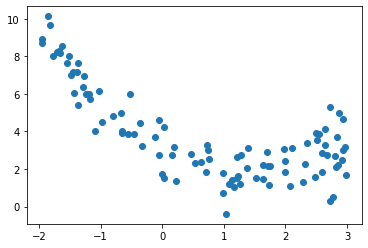

In [110]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)


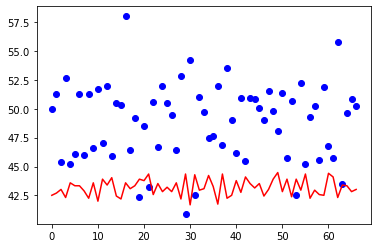

In [111]:
ran= range(0,67)
plt.plot(ran,y_pred,c='red')
plt.scatter(ran,y_test,c='blue')